In [1]:
# import os
# os.environ['DATA_READER_VENDOR'] = 'tiingo'
%pylab inline
from app.analysis import Quote
symbols = Quote.screen_securities(24)
print(len(symbols))
quote = Quote(symbols, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
379
from 2019-01-29 to 2019-07-29 - 379


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

288


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SNAP,122,0.790717,1.636902,0.478209,172.161749,18.137657
SHOP,122,0.576165,1.002860,0.566608,103.494361,13.405079
MELI,122,0.492250,1.152779,0.420127,86.029096,8.137133
WP,122,0.388197,0.592749,0.641520,68.048285,3.780273
APC,122,0.378067,1.471602,0.251516,59.419526,14.838180
QCOM,122,0.371197,1.748046,0.207810,54.929100,26.789112
VEEV,122,0.350998,0.810279,0.423387,54.150386,9.132334
BX,122,0.341363,0.761024,0.438129,52.077257,9.449767
TSS,122,0.336988,0.762914,0.431308,59.039206,5.379503


evicted TGT 0.529 -0.333
evicted DG 0.637 -0.286
evicted VEEV 0.648 -0.211
evicted MO 0.626 -0.267
evicted PAYX 0.689 -0.363
evicted BF-A 0.686 -0.188
evicted BTI 0.488 -0.177
evicted EQIX 0.573 -0.428
evicted AZO 0.558 -0.264
evicted TM 0.541 -0.253
evicted PYPL 0.690 -0.095
evicted PSX 0.644 -0.161
evicted PLD 0.661 -0.156
evicted COST 0.624 -0.228
evicted MCK 0.563 -0.271
evicted MCD 0.532 -0.224
evicted INTU 0.682 -0.120
evicted ADP 0.642 -0.188
evicted FLT 0.552 -0.263
evicted UTX 0.695 -0.248
evicted T 0.654 -0.213
evicted F 0.573 -0.225
evicted ROST 0.641 -0.229
evicted PSA 0.565 -0.433
evicted PM 0.652 -0.483
evicted DEO 0.667 -0.305
evicted ORCL 0.635 -0.213
evicted WBK 0.451 -0.153
evicted OKE 0.663 -0.207
evicted NOC 0.652 -0.310
evicted BCE 0.557 -0.150
evicted WCN 0.583 -0.452
evicted FDC 0.668 -0.239
evicted MMC 0.599 -0.082
evicted BAM 0.633 -0.050
evicted GIS 0.688 -0.395
evicted CNI 0.696 -0.220
evicted TJX 0.625 -0.272
evicted WLTW 0.608 -0.079
evicted VZ 0.530 -0.263

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.255910,0.168658,-0.098666,0.140595,0.246019,0.361884,0.739634,1.470277,39.324324,1.253377
HSY,122.0,0.299519,0.412393,-0.545597,0.025669,0.226425,0.509179,1.489761,0.707051,46.705711,3.101510
WP,122.0,0.388197,0.592749,-0.530340,-0.030071,0.263554,0.584952,2.464830,0.641520,68.048285,3.780273
BLL,122.0,0.275335,0.475275,-0.751189,-0.033998,0.193222,0.642724,1.529484,0.562619,41.443581,6.070490
JCI,122.0,0.187143,0.382225,-0.637762,-0.122026,0.173790,0.441177,1.256046,0.468850,26.383857,3.603832
AIG,122.0,0.241613,0.513099,-1.220302,-0.128884,0.231804,0.571726,1.846643,0.455421,35.451126,9.031233
TSS,122.0,0.336988,0.762914,-0.968957,-0.040315,0.221656,0.432638,4.171611,0.431308,59.039206,5.379503
WMT,122.0,0.144170,0.358404,-0.701803,-0.111937,0.158605,0.356840,1.225439,0.380112,17.333981,4.647744
RIO,122.0,0.102449,0.519233,-1.202352,-0.295823,0.061556,0.462389,1.212203,0.182024,14.426302,10.089440


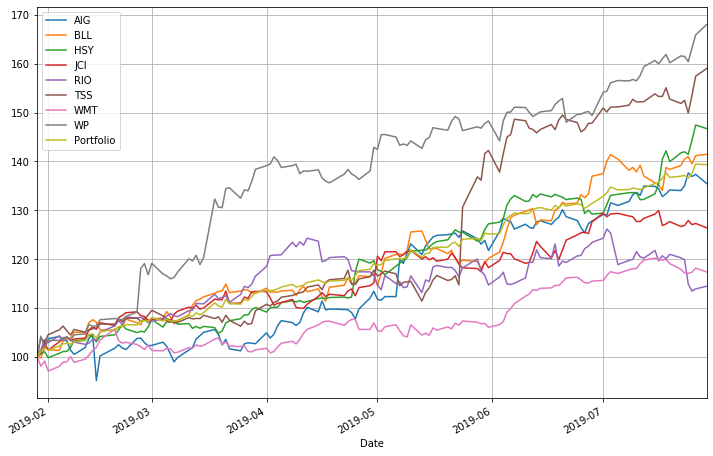

In [4]:
bounds = .22, .28
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(min_percent=.05, max_count=8, backlogs_pos_threshold=.7, bounds=bounds)
quote.setup_mask(['AIG', 'BLL', 'FB', 'HSY', 'JCI', 'TGT', 'WMT', 'WP'])
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(min_percent=.05, max_count=8, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

{'AIG': 0.097, 'BLL': 0.057, 'FB': 0.082, 'HSY': 0.254, 'JCI': 0.17, 'TGT': 0.08, 'WMT': 0.12, 'WP': 0.139}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.252492,0.171043,-0.111640,0.141503,0.231482,0.342339,0.704823,1.429790,38.577419,1.338479
HSY,122.0,0.299519,0.412393,-0.545597,0.025669,0.226425,0.509179,1.489761,0.707051,46.705711,3.101510
WP,122.0,0.388197,0.592749,-0.530340,-0.030071,0.263554,0.584952,2.464830,0.641520,68.048285,3.780273
BLL,122.0,0.275335,0.475275,-0.751189,-0.033998,0.193222,0.642724,1.529484,0.562619,41.443581,6.070490
JCI,122.0,0.187143,0.382225,-0.637762,-0.122026,0.173790,0.441177,1.256046,0.468850,26.383857,3.603832
AIG,122.0,0.241613,0.513099,-1.220302,-0.128884,0.231804,0.571726,1.846643,0.455421,35.451126,9.031233
WMT,122.0,0.144170,0.358404,-0.701803,-0.111937,0.158605,0.356840,1.225439,0.380112,17.333981,4.647744
FB,122.0,0.206002,0.815335,-1.886369,-0.291697,0.156796,0.735715,3.387085,0.242925,35.890144,16.022923
TGT,122.0,0.181046,0.724574,-1.816303,-0.166280,0.141668,0.472773,2.871817,0.238912,23.843884,14.223331


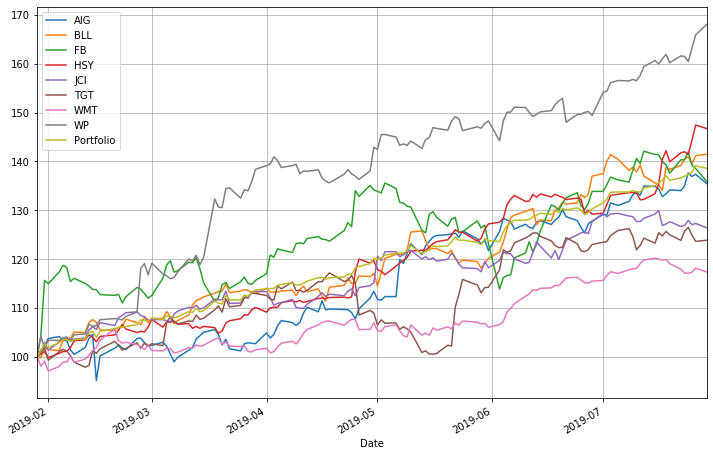

In [5]:
quote.setup_mask(['AIG', 'BLL', 'FB', 'HSY', 'JCI', 'TGT', 'WMT', 'WP'])
ratio, *_ = quote.find_optimal_ratio()
print(ratio)
quote.graph(ratio)